In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
import os
#from pandas_profiling import ProfileReport

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

In [3]:
def generate_profile(df):
    '''generate pandas profile'''
 
    profile = ProfileReport(df)   
    profile.to_widgets()

In [64]:
df = pd.read_csv('D:\cap\capstone2\data\interim\df_3.csv', low_memory=False)
df.head()

,pilot_key,ev_date,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,date_lst_med,medical_exp_date,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript,light_cond,wx_cond_basic,type_fly,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,20001208X0880311,1997-09-14,91,PILOT,46,M,CL3,UNK,1995-10-03,2000-10-01,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,Decision making/judgment,44,Pilot,DAYL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,20001208X0880311,1997-09-14,91,PILOT,46,M,CL3,UNK,1995-10-03,2000-10-01,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,84,Decision related to condition,DAYL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,20001208X0880311,1997-09-14,91,PILOT,46,M,CL3,UNK,1995-10-03,2000-10-01,3,Environmental issues,3,Conditions/weather/phenomena,50,Ceiling/visibility/precip,75,Below VFR minima,82,Effect on operation,DAYL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
3,20001208X0880311,1997-09-14,91,PILOT,46,M,CL3,UNK,1995-10-03,2000-10-01,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,12,Altitude,20,Not attained/maintained,DAYL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
4,20001208X0880311,1997-09-14,91,PILOT,46,M,CL3,UNK,1995-10-03,2000-10-01,1,Aircraft,6,Aircraft oper/perf/capability,20,Performance/control parameters,0,(general),20,Not attained/maintained,DAYL,IMC,PERS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


Task: look at description of findings and filter out those not directly pertaining with pilots.

In [70]:
env_records = df.loc[df['cat_descript'] == 'Environmental issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript']]
env_records.sub_descript.unique()

array(['Conditions/weather/phenomena', 'Physical environment',
       'Operating environment', 'Task environment'], dtype=object)

In [ ]:
def CauseBreakDown(cause):
    df_cause = df[df['cat_descript'] != 'Organizational issues']
    
    
    
    

In [71]:
conditions = pd.DataFrame(env_records.subsec_descript.unique())
conditions.to_csv('D:\cap\capstone2\data\interim\wxcond.csv')

In [72]:

temp = pd.read_csv('D:\cap\capstone2\data\interim\wxcond_fixed.csv', names=['cond', 'new_cond'], header=None)
mapper = dict(zip(temp.cond, temp.new_cond))


In [73]:
#Map new values
df['subsec_descript'] = df['subsec_descript'].map(mapper)

In [74]:
env_records = df.loc[df['cat_descript'] == 'Environmental issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript']]
env_records.subsec_descript.value_counts()

Winds                                1859
Obstacle                             1412
(general)                             730
Terrain Condition                     409
DARK                                  277
Low Celings                           257
Snowy/Icing Conditions                236
Wx Effect on AC                       233
FOG/OBSC/LOWVIS                       224
Aircraft                              202
Terrain                               179
High Altitude                         161
Wet/muddy                             153
WILDLIFE                              148
Surface Condition                     130
Impared Perception (light effect)     124
Downdraft/Updraft                     111
Sloped/uneven terrain                  80
Facilites Lighting                     76
Adverse WX (Thunder/Sand storms)       75
Snowy/IcingConditions                  74
Clouds                                 64
Turbulance                             61
Water                             

In [75]:
env_records.mod_descript.unique()

array(['Decision related to condition', 'Effect on operation',
       'Not specified', 'Effect on personnel', 'Awareness of condition',
       'Contributed to outcome', 'Effect on equipment',
       'Response/compensation', 'Ability to respond/compensate',
       'Availability of related info', 'Use of related info',
       'Compliance w/ procedure', 'Accuracy of related info',
       'Timing of related info'], dtype=object)

In [76]:
#condense environmental mod_descripts

cat_idx = df.columns.get_loc('cat_descript')
mod_idx = df.columns.get_loc('mod_descript')

for i in range (len(df)):
    if df.iloc[i,cat_idx] == 'Environmental issues':
        if df.iloc[i, mod_idx] == 'Ability to respond/compensate':
            df.iloc[i, mod_idx] = 'Response/compensation'
        elif df.iloc[i, mod_idx] == 'Timing of related info':
            df.iloc[i, mod_idx] = 'Availability of related info'
            
env_records.mod_descript.value_counts()

Contributed to outcome           2411
Effect on operation              2368
Effect on equipment               689
Response/compensation             455
Decision related to condition     411
Not specified                     405
Effect on personnel               339
Ability to respond/compensate     277
Awareness of condition            194
Accuracy of related info           13
Availability of related info       13
Compliance w/ procedure            13
Timing of related info              6
Use of related info                 6
Name: mod_descript, dtype: int64

All environmetal issues appear to be applicable to analysis and these records will be retained.

Analize caracteritics of findings with category aircraft.

In [77]:
aircraft = df.loc[df['cat_descript'] == 'Aircraft' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript']]

In [78]:
aircraft.sub_descript.unique()

array(['Aircraft oper/perf/capability', 'Aircraft power plant',
       'Aircraft structures', 'Aircraft systems',
       'Aircraft handling/service', 'Aircraft propeller/rotor',
       'Fluids/misc hardware'], dtype=object)

In [79]:
aircraft.sec_descript.unique()

array(['Performance/control parameters', 'Engine (turbine/turboprop)',
       'Aircraft capability', '(general)', 'Fuel system',
       'Engine (reciprocating)', 'Power plant', 'Flight control system',
       'Maintenance/inspections', 'Landing gear system',
       'Engine fuel and control', 'Ignition system',
       'Electrical power system', 'Auto flight system',
       'Navigation system', 'Tail rotor drive system',
       'Main rotor system', 'Vacuum system', 'Air conditioning system',
       'Doors', 'Fluids', 'Engine controls', 'Propeller system',
       'Empennage structure', 'Hydraulic power system', 'Engine exhaust',
       'Eng oil sys (airframe furnish)', 'Wing structure', 'Fuselage',
       'Rotorcraft flight control', 'Misc hardware', 'Loading',
       'Balloon/dirigible structures', 'Equipment/furnishings',
       'Towing and taxiing', 'Main rotor drive',
       'Indicating/recording systems', 'Parking/securing',
       'Placards and markings', 'Tail rotor', 'Oxygen syste

In [80]:
aircraft.subsec_descript.unique()

array([nan, '(general)', 'Water'], dtype=object)

In [81]:
air_mod = aircraft.mod_descript.unique().tolist()
air_mod

['Not attained/maintained',
 'Fatigue/wear/corrosion',
 'Capability exceeded',
 'Failure',
 'Malfunction',
 'Incorrect service/maintenance',
 'Not specified',
 'Damaged/degraded',
 'Incorrect use/operation',
 'Attain/maintain not possible',
 'Inadequate inspection',
 'Not serviced/maintained',
 'Design',
 'Fluid level',
 'Inoperative',
 'Fluid management',
 'Fluid condition',
 'Related operating info',
 'Not used/operated',
 'Unintentional use/operation',
 'Unneccessary use/operation',
 'Related maintenance info',
 'Not inspected',
 'Fluid type',
 'Related records',
 'Flight compartment window',
 '(general',
 'generator drive sy',
 'down/moorin',
 'straine',
 'alternato',
 'Door window',
 'Not installed/available',
 'ice, deic',
 'Unnecessary use/operation']

In [82]:
#Keep only those records related to pilot action

rec_keep = ['Not attained/maintained', 'Capability exceeded', 'Damaged/degraded', 'Incorrect use/operation', 'Attain/maintain not possible',
 'Unintentional use/operation', 'Fluid level', 'Inoperative', 'Fluid management', 'Not used/operated',  
 'Unneccessary use/operation', 'Simulated malf/failure', 'Unnecessary use/operation']

combined = combined[(combined['cat_descript'] == 'Aircraft') & (combined['mod_descript'].isin(rec_keep))]

In [83]:
aircraft = combined[combined['cat_descript'] == 'Aircraft']

In [84]:
aircraft.mod_descript.value_counts()

Not attained/maintained         7295
Incorrect use/operation         1470
Capability exceeded              932
Fluid level                      613
Attain/maintain not possible     524
Damaged/degraded                 432
Fluid management                 398
Not used/operated                263
Unintentional use/operation      136
Inoperative                      117
Unneccessary use/operation         9
Simulated malf/failure             5
Unnecessary use/operation          2
Name: mod_descript, dtype: int64

In [85]:
#condense mod_descriptions into more general categories

cat_idx = combined.columns.get_loc('cat_descript')
mod_idx = combined.columns.get_loc('mod_descript')

for i in range (0, len(combined)):
    if combined.iloc[i,cat_idx] == 'Aircraft':
        if combined.iloc[i, mod_idx] == 'Unnecessary use/operation':
            combined.iloc[i, mod_idx] = 'Improper use/operation'
        elif combined.iloc[i, mod_idx] == 'Unneccessary use/operation':
            combined.iloc[i, mod_idx] = 'Improper use/operation'
        elif combined.iloc[i, mod_idx] == 'Incorrect use/operation':
            combined.iloc[i, mod_idx] = 'Improper use/operation'
        elif combined.iloc[i, mod_idx] == 'Fluid level':
            combined.iloc[i, mod_idx] = 'Fluid management'
        elif combined.iloc[i, mod_idx] == 'Damaged/degraded':
            combined.iloc[i, mod_idx] = 'Damaged/degraded/inoperative'
        elif combined.iloc[i, mod_idx] == 'Inoperative':
            combined.iloc[i, mod_idx] = 'Damaged/degraded/inoperative'
            
            

In [86]:
aircraft = combined[combined['cat_descript'] == 'Aircraft']
aircraft.mod_descript.value_counts()

Not attained/maintained         7295
Improper use/operation          1481
Fluid management                1011
Capability exceeded              932
Damaged/degraded/inoperative     549
Attain/maintain not possible     524
Not used/operated                263
Unintentional use/operation      136
Simulated malf/failure             5
Name: mod_descript, dtype: int64

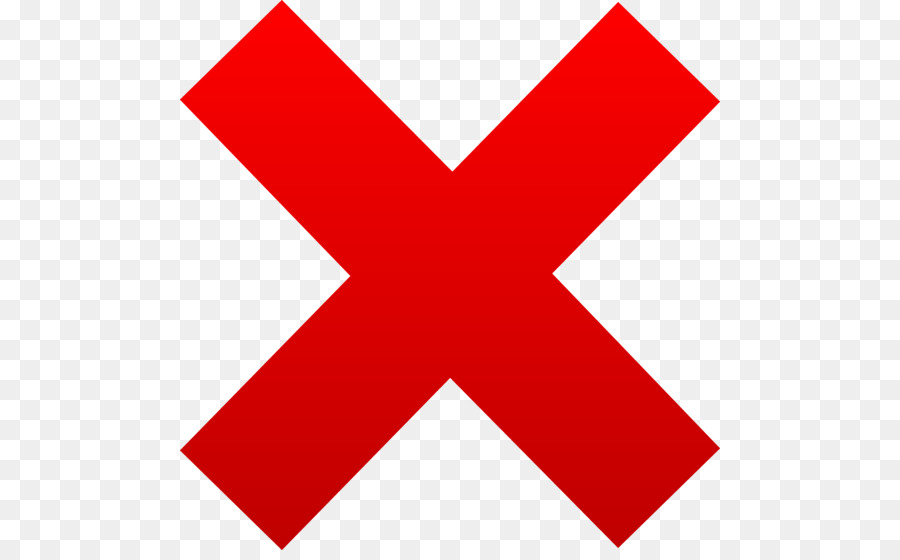

In [87]:
#combined.to_csv('/Users/Birr/projects/cap2/data/interim/df_aged.csv', index=False)
df.to_csv('D:\cap\capstone2\data\interim\df_3.csv', index=False)

In [88]:
#Reload data

#df = pd.read_csv('/Users/Birr/projects/cap2/data/interim/df_aged.csv', low_memory=False)
df = pd.read_csv('D:\cap\capstone2\data\interim\df_3.csv', low_memory=False)

In [89]:
personnel_records = df.loc[df['cat_descript'] == 'Personnel issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript']]
personnel_records.head()

,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript
0,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,NaN,44,Pilot
7,2,Personnel issues,1,Physical,30,Health/Fitness,20,NaN,44,Pilot
10,2,Personnel issues,2,Psychological,20,Perception/orientation/illusio,15,NaN,44,Pilot
14,2,Personnel issues,6,Task performance,30,Use of equip/info,40,NaN,44,Pilot
18,2,Personnel issues,1,Physical,20,Impairment/incapacitation,10,NaN,44,Pilot


In [90]:
per = pd.DataFrame(personnel_records.subsec_descript.unique())
per.to_csv('D:\cap\capstone2\data\interim\personnel.csv')

In [91]:
temp = pd.read_csv('D:\cap\capstone2\data\interim\personnel_fixed.csv', names=['cond', 'new_cond'], header=None)
mapper = dict(zip(temp.cond, temp.new_cond))
print(mapper)

{'Decision making/judgment': 'Decision making/judgment', 'Use of medication/drugs': 'medication/drugs', 'Visual illusion/disorientation': 'Visual illusion/disorientation', 'Aircraft control': 'Aircraft control', 'Illness/injury': 'Illness/injury', 'Alcohol': 'Alchohol', 'Incorrect action performance': 'Incorrect Action', 'OTC medication': 'medication/drugs', 'Lack of action': 'Incorrect Action', 'Monitoring other aircraft': 'Monitoring other aircraft', '(general)': '(general)', 'Spatial disorientation': 'Spatial disorientation', 'Repair': 'AC Modification/Repair', 'Incomplete action': 'Incorrect Action', 'Recent instrument experience': 'Limited Experience for Conditions', 'Incorrect action sequence': 'Incorrect Action', 'Weather planning': 'Weather planning/Awareness', 'Installation': 'Installation', 'Modification/alteration': 'AC Modification/Repair', 'Total experience w/ equipment': 'Limited Experience for Conditions', 'Knowledge of meteorologic cond': 'Weather planning/Awareness', '

In [92]:
#Map new values
df['subsec_descript'] = df['subsec_descript'].map(mapper)

In [93]:
personnel_records = df.loc[df['cat_descript'] == 'Personnel issues' , ['category_no', 'cat_descript', 'subcategory_no', 'sub_descript', 'section_no', 'sec_descript', 'subsection_no', 'subsec_descript', 'modifier_no', 'mod_descript']]

In [94]:
personnel_records.head()

,category_no,cat_descript,subcategory_no,sub_descript,section_no,sec_descript,subsection_no,subsec_descript,modifier_no,mod_descript
0,2,Personnel issues,4,Action/decision,15,Info processing/decision,20,NaN,44,Pilot
7,2,Personnel issues,1,Physical,30,Health/Fitness,20,NaN,44,Pilot
10,2,Personnel issues,2,Psychological,20,Perception/orientation/illusio,15,NaN,44,Pilot
14,2,Personnel issues,6,Task performance,30,Use of equip/info,40,NaN,44,Pilot
18,2,Personnel issues,1,Physical,20,Impairment/incapacitation,10,NaN,44,Pilot


In [95]:
personnel_records.subsec_descript.unique()


array([nan, '(general)'], dtype=object)